# <span style='font-family:Inter Black'> Bond Duration and Convexity </span>

[**Source for formulas LaTeX**](https://www.5minutefinance.org/concepts/duration)

## <span style='font-family:Inter'> Bond Duration </span>

The formula for the Macaulay Duration is:

$$\text{Macaulay Duration} = \sum_{i = 1}^n {(i)\frac{\bigg(\frac{CF_i}{(1+YTM)^i}\bigg)}{BP}}$$

where 

$$BP = \sum_{i = 1}^n {\frac{CF_i}{(1+YTM)^i}}$$


So, the discounted cash flows divided by the price of the bond constitute some weights by which every maturity is weighted.

Macaulay Duration is a bit off however, so we adjust it by dividing it by $(1+YTM)$. The result (Modified Duration) then matches the derivative of the bond’s price with respect to YTM.

$$\frac{\% \Delta}{1 \%} \approx \text{Modified Duration} = \frac{\text{Maucaulay Duration}}{(1+YTM)}$$

The Modified duration expresses a linear approximation of minus the percent change in its price given a 100 basis point change in interest rates. The difference between the linear approximation and the real price change represents the **bond convexity**. 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Finance.Bond.bond import Bond

We are iterating over a set of yield-to-maturity

In [10]:
yield_list = list(np.arange(-0.05, 0.15, 0.005))
yield_list = [round(y, 4) for y in yield_list]

In [11]:
price_yield = {}
macaulay_duration_dict = {}
modified_duration_dict = {}

for ytm in yield_list:
    bond = Bond(face_value=100, 
                coupon=0.03,
                years=10,
                price=None,
                ytm=ytm)
    

    price_yield[ytm] = bond.get_metrics()
    mac_dur, mod_dur = bond.get_duration()
    macaulay_duration_dict[ytm] = mac_dur
    modified_duration_dict[ytm] = mod_dur

The slope on a price-yield chart is not one of the two durations calculated (the modified duration represents the percentage change of an instrument), but it will be the "dollar duration", i.e. $-\text{Modified Duration} * \text{Price}$. 

In [12]:
# todo dropdown menu
chosen_ytm = 0.05

In [13]:
slope =  -modified_duration_dict[chosen_ytm] * price_yield[chosen_ytm]
constant = price_yield[chosen_ytm] - slope * chosen_ytm 
tangent_dict = {}
for ytm in yield_list:   
    rnd_ytm = round(ytm, 4)
    tangent_dict[rnd_ytm] = constant + slope * rnd_ytm
    
dur_tangent = pd.Series(tangent_dict)
dur_tangent.name = 'Duration Tangent'

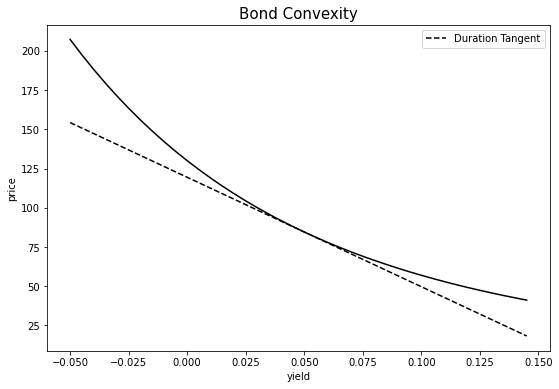

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
p_y = pd.Series(price_yield)
dur_tangent.plot(legend=True, linestyle='dashed', color='black')
p_y.plot(ax=ax, color='black')
ax.set_xlabel("yield")
ax.set_ylabel("price")
ax.set_title('Bond Convexity', fontsize=15)
plt.show()

### <span style='font-family:Inter'> Yield Vs. Duration </span>

Moreover, the duration of the bond decreases as the yield increases, since the cash flows get more and more unbalanced on the short term.

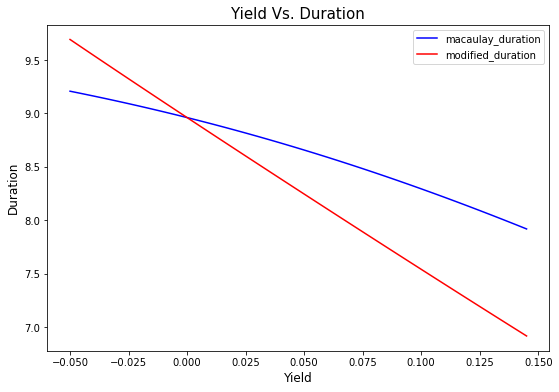

In [15]:
fig1 = plt.figure(1, figsize=(9, 6))
ax1 = fig1.add_subplot(111)

macaulay_duration = pd.Series(macaulay_duration_dict)
modified_duration = pd.Series(modified_duration_dict)

macaulay_duration.name = 'macaulay_duration'
modified_duration.name = 'modified_duration'

macaulay_duration.plot(ax=ax1, legend=True, color='blue')
modified_duration.plot(ax=ax1, legend=True, color='red')

ax1.set_xlabel('Yield', fontsize=12)
ax1.set_ylabel('Duration', fontsize=12)
ax1.set_title('Yield Vs. Duration', fontsize=15)
plt.show()

### <span style='font-family:Inter'> Maturity Vs. Duration </span>

In [16]:
mat_list = list(np.arange(1, 50, 1))

premium_modified_duration_dict = {}
for maturity in mat_list:
    bond = Bond(face_value=100, coupon=0.04, years=maturity, price=None, ytm=0.01)
    mac_dur, mod_dur = bond.get_duration()
    premium_modified_duration_dict[maturity] = mac_dur
    

discount_modified_duration_dict = {}
for maturity in mat_list:
    bond = Bond(face_value=100, coupon=0.04, years=maturity, price=None, ytm=0.18)
    mac_dur, mod_dur = bond.get_duration()
    discount_modified_duration_dict[maturity] = mac_dur
    
zcb_modified_duration_dict = {}
for maturity in mat_list:
    bond = Bond(face_value=100, coupon=0.0, years=maturity, price=None, ytm=0.18)
    mac_dur, mod_dur = bond.get_duration()
    zcb_modified_duration_dict[maturity] = mac_dur
    

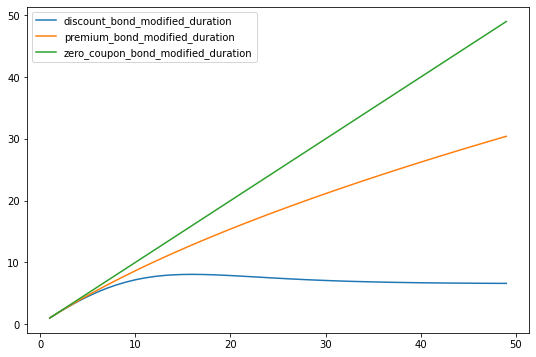

In [17]:
fig2 = plt.figure(1, figsize=(9, 6))
ax2 = fig2.add_subplot(111)

premium_bond_mod_dur = pd.Series(premium_modified_duration_dict)
discount_bond_mod_dur = pd.Series(discount_modified_duration_dict)
zcb_bond_mod_dur = pd.Series(zcb_modified_duration_dict)

premium_bond_mod_dur.name = 'premium_bond_modified_duration'
discount_bond_mod_dur.name = 'discount_bond_modified_duration'
zcb_bond_mod_dur.name = 'zero_coupon_bond_modified_duration'

discount_bond_mod_dur.plot(legend=True, ax=ax2)
premium_bond_mod_dur.plot(legend=True, ax=ax2)
zcb_bond_mod_dur.plot(legend=True, ax=ax2)

plt.show()